In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [65]:
df = pd.read_csv('airline_passenger_satisfaction.csv')

In [66]:
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [67]:
df.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [68]:
df.Satisfaction.unique()

array(['Neutral or Dissatisfied', 'Satisfied'], dtype=object)

- ID is unique so, it is of no use
- Droping the ID columns

In [69]:
df.drop("ID", axis = 1, inplace = True)

In [70]:
df.shape

(129880, 23)

## Missing Values

In [71]:
df.isna().sum()

Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment                     0
Baggage Handling                  

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Arrival Delay', ylabel='Density'>

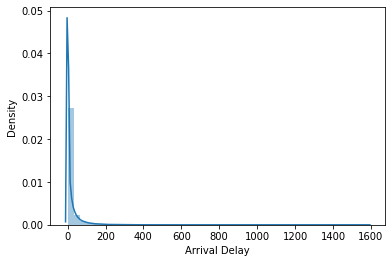

In [72]:
sns.distplot(a=df['Arrival Delay'])

- Majority is with 0 waiting time
- so I will fill the arrival time with 0

In [73]:
df['Arrival Delay'] = df['Arrival Delay'].fillna(0)

In [74]:
# Converting the target columns into integer valueable
df['Satisfaction'].unique()

array(['Neutral or Dissatisfied', 'Satisfied'], dtype=object)

In [75]:
df['Satisfaction'] = df['Satisfaction'].map({'Satisfied': 1, 'Neutral or Dissatisfied':0})

In [76]:
df['Satisfaction'].unique()

array([0, 1], dtype=int64)

# EDA and Feature selection

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  129880 non-null  object 
 1   Age                                     129880 non-null  int64  
 2   Customer Type                           129880 non-null  object 
 3   Type of Travel                          129880 non-null  object 
 4   Class                                   129880 non-null  object 
 5   Flight Distance                         129880 non-null  int64  
 6   Departure Delay                         129880 non-null  int64  
 7   Arrival Delay                           129880 non-null  float64
 8   Departure and Arrival Time Convenience  129880 non-null  int64  
 9   Ease of Online Booking                  129880 non-null  int64  
 10  Check-in Service                        1298

- I will build new dataframe inorder to not disturb the main dataframe

<AxesSubplot:>

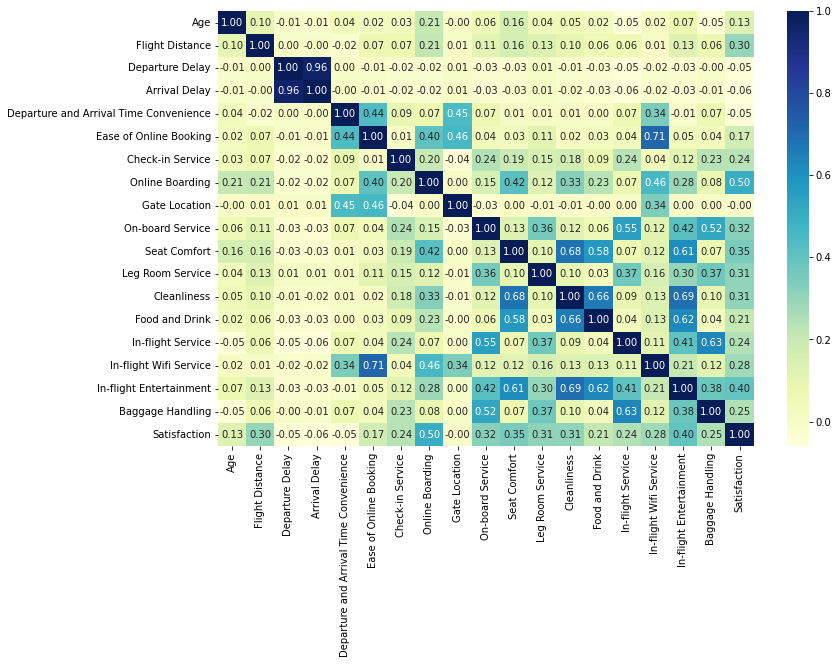

In [78]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot = True, fmt='1.2f', cmap='YlGnBu')

In [79]:
final_df = pd.DataFrame()

In [80]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Empty DataFrame

In [81]:
plt.figure(figsize=(8, 8))

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [151]:
def bar(df, feature, size=(5, 4)):
    plt.figure(figsize=size)
    sns.barplot(x=feature, y='Satisfaction', data = df)
    plt.show()

## Gender

In [83]:
df['Male'] = [0 if i == 'Female' else 1 for i in df['Gender']]

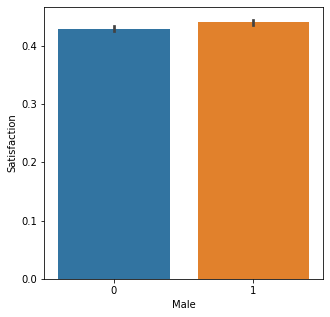

In [84]:
bar(df, 'Male', (5, 5))

- Here Gender is not creating more of impact on Target
- Average of both Gender has same impact on Target
- I will not consider the Gender in features selection

## Age

<AxesSubplot:xlabel='Satisfaction', ylabel='Age'>

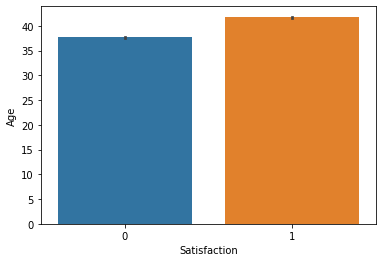

In [85]:
sns.barplot(x='Satisfaction', y='Age', data = df)

<AxesSubplot:xlabel='Age', ylabel='Satisfaction'>

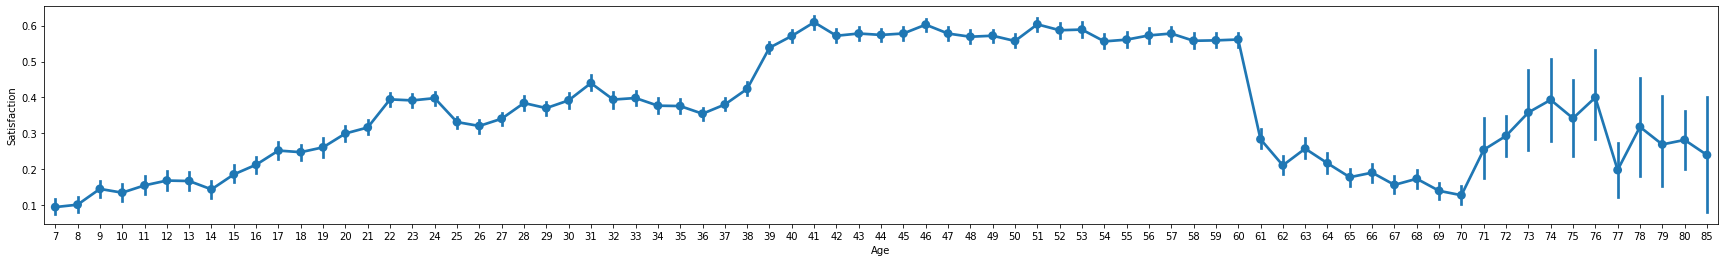

In [86]:
plt.figure(figsize=(30, 4))
sns.pointplot(x='Age', y='Satisfaction', data = df)

In [87]:
"""

Age Group:
0  - 21 : 0
21 - 39 : 1
39 - 61 : 2
61 - 71 : 3
71 +    : 4

"""
age_grp = []
for i in df['Age']:
    if i < 21:
        age_grp.append(0)
    elif i >= 21 and i < 39:
        age_grp.append(1)
    elif i >= 39 and i < 61:
        age_grp.append(2)
    elif i >= 61 and i < 71:
        age_grp.append(3)
    else:
        age_grp.append(4)

final_df['Age_Grp'] = age_grp

In [88]:
final_df.head()

,Age_Grp
0,2
1,1
2,2
3,2
4,2


## Customer type

In [89]:
df['Customer Type'].unique()

array(['First-time', 'Returning'], dtype=object)

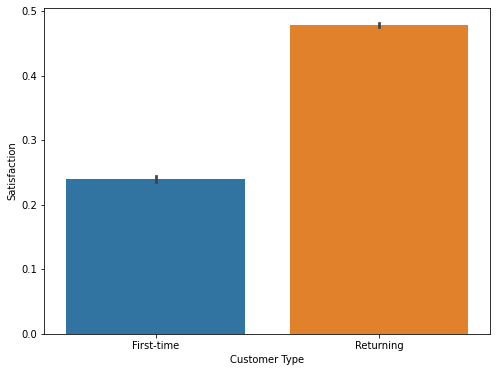

In [90]:
bar(df, 'Customer Type')

- Here returning customer is higly satisfied
- So it making sense to keep it in features

In [91]:
final_df['Returning'] = pd.get_dummies(df['Customer Type'], drop_first=True)

In [92]:
final_df.head()

,Age_Grp,Returning
0,2,0
1,1,1
2,2,1
3,2,1
4,2,1


In [93]:
df.columns

Index(['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction', 'Male'],
      dtype='object')

## Type of travel

In [94]:
df['Type of Travel'].unique()

array(['Business', 'Personal'], dtype=object)

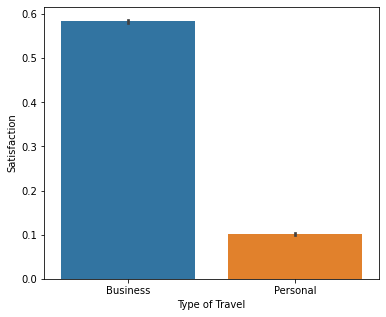

In [95]:
bar(df, 'Type of Travel', (6, 5))

- Here it is making some sense to the target values
- So keep it also.

## Class

In [96]:
df['Class'].unique()

array(['Business', 'Economy', 'Economy Plus'], dtype=object)

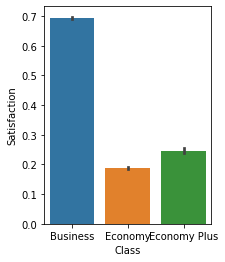

In [97]:
bar(df, 'Class', (3, 4))

- Here bussiness class creating much more difference than others.
- So i will merge the both economy class together as seperate variable

In [98]:
final_df['Class'] = [0 if i == 'Business' else 1 for i in df['Class']]

In [99]:
final_df.head()

,Age_Grp,Returning,Class
0,2,0,0
1,1,1,0
2,2,1,0
3,2,1,0
4,2,1,0


## Flight Distance

In [100]:
df['Flight Distance']

0          821
1          821
2          853
3         1905
4         3470
          ... 
129875     447
129876     308
129877     337
129878     337
129879     337
Name: Flight Distance, Length: 129880, dtype: int64

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Flight Distance', ylabel='Density'>

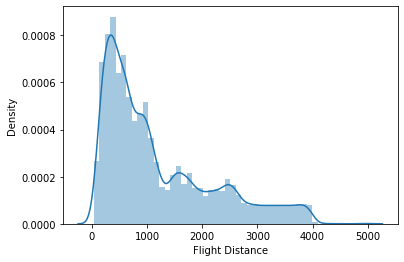

In [101]:
sns.distplot(df['Flight Distance'])

- Looks like more passengers are travelling below about 1300

<AxesSubplot:xlabel='Satisfaction', ylabel='Flight Distance'>

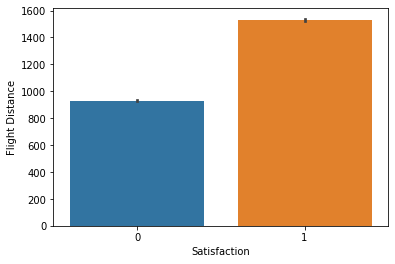

In [102]:
sns.barplot(x='Satisfaction', y='Flight Distance', data = df)

- The customer travell more are highly statisfied than who travel less
- So we can divide the data into category like

In [103]:
"""

0 - 1200 : 0
1200 ++  : 1

"""

final_df['Flight_Distance'] = [0 if i < 1200 else 1 for i in df['Flight Distance']]

In [104]:
final_df.head()


,Age_Grp,Returning,Class,Flight_Distance
0,2,0,0,0
1,1,1,0,0
2,2,1,0,0
3,2,1,0,1
4,2,1,0,1


## Departure Delay

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Departure Delay', ylabel='Density'>

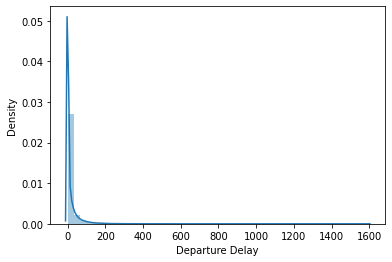

In [105]:
plt.figure(figsize=(6, 4))
sns.distplot(df['Departure Delay'])

- Looks like more are not from much more fligh delay
- Divide the delay into two category like delyed or not

In [106]:
"""
0 : 0
else : 1

"""

final_df['Flight_Delay'] = [0 if i == 0 else 1 for i in df['Departure Delay']] 
final_df.head()

,Age_Grp,Returning,Class,Flight_Distance,Flight_Delay
0,2,0,0,0,1
1,1,1,0,0,1
2,2,1,0,0,0
3,2,1,0,1,0
4,2,1,0,1,0


## Arrival Delay

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Arrival Delay', ylabel='Density'>

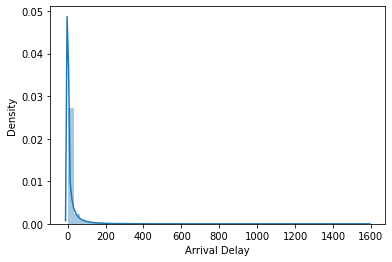

In [107]:
sns.distplot(df['Arrival Delay'])

- Same with Arrival Delay 
- Divide the Arrival Delay into delay or not

In [108]:
final_df['Arrival_Delay'] = [0 if i == 0 else 1 for i in df['Arrival Delay']]

In [109]:
final_df.head()

,Age_Grp,Returning,Class,Flight_Distance,Flight_Delay,Arrival_Delay
0,2,0,0,0,1,1
1,1,1,0,0,1,1
2,2,1,0,0,0,0
3,2,1,0,1,0,0
4,2,1,0,1,0,1


In [110]:
df.columns

Index(['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction', 'Male'],
      dtype='object')

## Departure and Arrival Time Convenience

In [111]:
df['Departure and Arrival Time Convenience'].unique()

array([3, 2, 4, 1, 5, 0], dtype=int64)

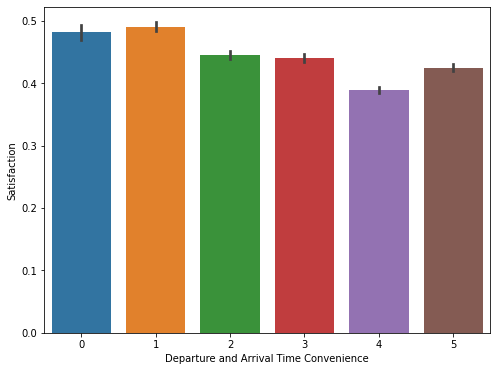

In [112]:
bar(df, 'Departure and Arrival Time Convenience')

- Here Departure and Arrival Time Convenience is not making so much correlation between the Satisfaction
- On average it make same sense to Satisfaction so it will not be considered in model

## Ease of Online Booking

In [113]:
df['Ease of Online Booking'].unique()

array([3, 2, 4, 1, 5, 0], dtype=int64)

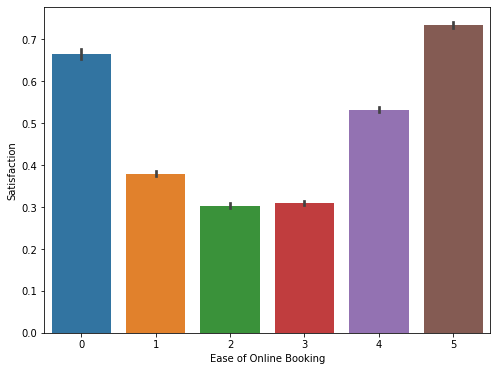

In [114]:
bar(df, 'Ease of Online Booking')

- It is making much more difference between the target columns
- So let's check correlation score of it.
- Divide the Ease of Online Booking into 2 category with much satisfied and not satisfied

In [115]:
final_df['Ease'] = [0 if i == 0 or i == 4 or i == 5 else 1 for i in df['Ease of Online Booking']]

In [116]:
final_df.head()

,Age_Grp,Returning,Class,Flight_Distance,Flight_Delay,Arrival_Delay,Ease
0,2,0,0,0,1,1,1
1,1,1,0,0,1,1,1
2,2,1,0,0,0,0,0
3,2,1,0,1,0,0,1
4,2,1,0,1,0,1,1


## Check-in Service

In [117]:
df['Check-in Service'].unique()

array([4, 3, 1, 2, 5, 0], dtype=int64)

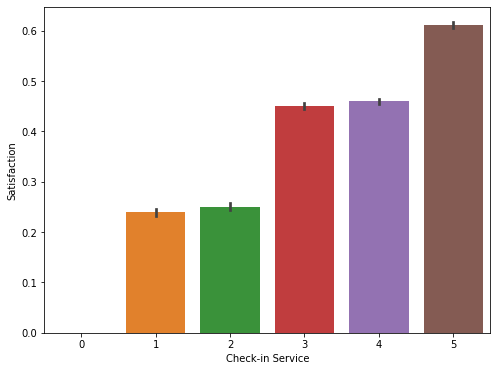

In [118]:
bar(df, 'Check-in Service')

- Here there is no any customer from category 0
- It is showing three category so we can divide it.

In [119]:
"""
0 - 2 : 0
3 - 4 : 1
5     : 2
"""
final_df['Check-in Service'] = [0 if i <= 2 else 1 if i == 3 or i == 4 else 2 for i in df['Check-in Service']] 
final_df.head()

,Age_Grp,Returning,Class,Flight_Distance,Flight_Delay,Arrival_Delay,Ease,Check-in Service
0,2,0,0,0,1,1,1,1
1,1,1,0,0,1,1,1,1
2,2,1,0,0,0,0,0,1
3,2,1,0,1,0,0,1,1
4,2,1,0,1,0,1,1,1


In [120]:
final_df['Check-in Service'].unique()

array([1, 0, 2], dtype=int64)

## Online Boarding 

In [121]:
df['Online Boarding'].unique()

array([3, 5, 4, 2, 1, 0], dtype=int64)

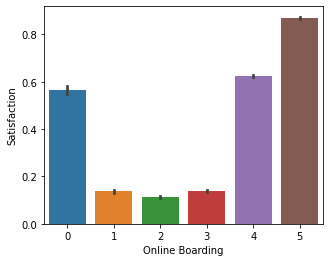

In [122]:
bar(df, 'Online Boarding', (5, 4))

- Category 1,2 & 3 are not much satisfied
- It is forming three category like 1,2&3 are not satisfied much
- Category 0 & 4 are on similar level of satisfaction while 5 are much satisfied

In [123]:
final_df['Online_Boarding'] = [0 if i == 5 else 1 if i == 0 or i == 4 else 2 for i in df['Online Boarding']]
final_df.head()

,Age_Grp,Returning,Class,Flight_Distance,Flight_Delay,Arrival_Delay,Ease,Check-in Service,Online_Boarding
0,2,0,0,0,1,1,1,1,2
1,1,1,0,0,1,1,1,1,0
2,2,1,0,0,0,0,0,1,0
3,2,1,0,1,0,0,1,1,1
4,2,1,0,1,0,1,1,1,0


## Gate Location

In [124]:
df['Gate Location'].unique()

array([3, 2, 4, 1, 5, 0], dtype=int64)

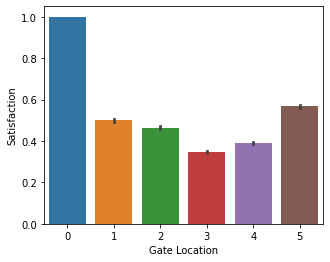

In [125]:
bar(df, 'Gate Location', (5, 4))

- Here whose gate location is 0 are highly satisfied but others are some average
- From 1 - 5 all are similar on average

In [128]:
final_df['Gate_Location'] = [0 if i == 0 else 1 for i in df['Gate Location']]
final_df.head()

,Age_Grp,Returning,Class,Flight_Distance,Flight_Delay,Arrival_Delay,Ease,Check-in Service,Online_Boarding,Gate_Location
0,2,0,0,0,1,1,1,1,2,1
1,1,1,0,0,1,1,1,1,0,1
2,2,1,0,0,0,0,0,1,0,1
3,2,1,0,1,0,0,1,1,1,1
4,2,1,0,1,0,1,1,1,0,1


## On-board Service

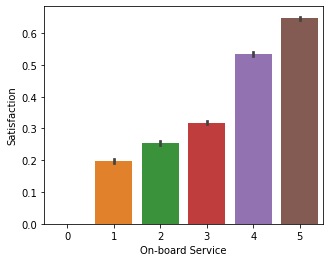

In [129]:
bar(df, 'On-board Service', (5, 4))

- Here On-board Service is good related with Satisfaction
- but still 0-3 are not much satisfied, their average are so low
- We can consider the 0-3 as one and 4-5 as other

In [130]:
final_df['On-board_Service'] = [0 if i <= 3 else 1 for i in df['On-board Service']]
final_df.head()

,Age_Grp,Returning,Class,Flight_Distance,Flight_Delay,Arrival_Delay,Ease,Check-in Service,Online_Boarding,Gate_Location,On-board_Service
0,2,0,0,0,1,1,1,1,2,1,0
1,1,1,0,0,1,1,1,1,0,1,1
2,2,1,0,0,0,0,0,1,0,1,0
3,2,1,0,1,0,0,1,1,1,1,1
4,2,1,0,1,0,1,1,1,0,1,0


## Seat Comfort

In [131]:
df['Seat Comfort'].unique()

array([5, 4, 3, 2, 1, 0], dtype=int64)

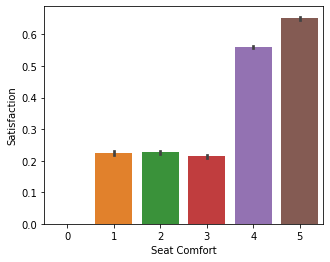

In [132]:
bar(df, 'Seat Comfort', (5, 4))

- Here is same case like above 

In [134]:
final_df['Seat_Comfort'] = [0 if i <= 3 else 1 for  i in df['Seat Comfort']]

In [137]:
final_df['Seat_Comfort'].unique()

array([1, 0], dtype=int64)

## Leg Room Service

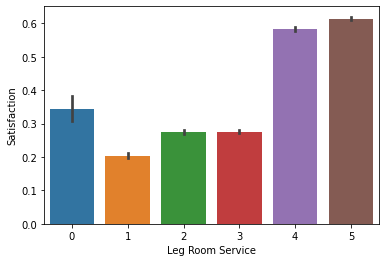

In [138]:
bar(df, 'Leg Room Service', (6, 4))

- Here Leg Room Service are some what correlating with satisfaction
- But 0 has a lot of variation with respect to satisfaction 
- so we can ignore or put on same category with 1, 2, and 3

In [140]:
final_df['Leg_Room_Service'] = [0 if i <= 3 else 1 for  i in df['Leg Room Service']]
final_df['Leg_Room_Service'].unique()

array([0, 1], dtype=int64)

In [141]:
df.columns

Index(['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction', 'Male'],
      dtype='object')

## Cleanliness

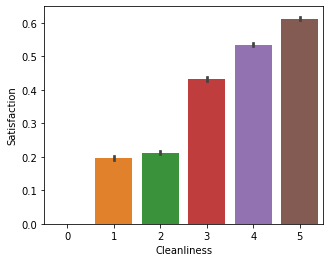

In [142]:
bar(df, 'Cleanliness', (5, 4))

- Here it is higly correlating with satisfaction 
- so i will kept it as it is but convert 0-2 category as 1 as they are similar kind of.

In [145]:
final_df['Cleanliness'] = [0 if i <= 2 else 1 if i == 3 else 2 if i == 4 else 3 for i in df['Cleanliness']]
final_df['Cleanliness'].unique()

array([3, 2, 1, 0], dtype=int64)

## Food and Drink

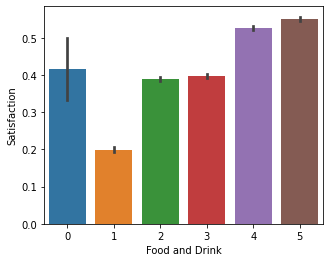

In [146]:
bar(df, 'Food and Drink', (5, 4))

- Here category 0 has a lot of variation.
- 4 and 5 are averagely satisfied
- We can define three category here 

In [149]:
"""
0 & 1 : 0
2 & 3 : 1
4 & 5 : 2
"""

final_df['Food_and_Drink'] = [0 if i == 0 or i == 1 else 1 if i == 3 or i == 4 else 2 for i in df['Food and Drink']]
final_df['Food_and_Drink'].unique()

array([2, 1, 0], dtype=int64)

## In-flight Service

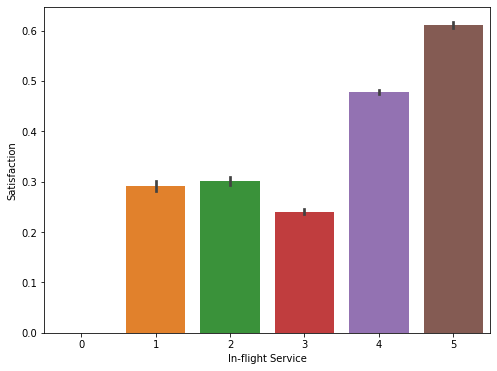

In [150]:
bar(df, 'In-flight Service')

* Here category having 0-3 are mostly not satisfied 
* Category 4 has equal probablity but category 5 has mostly satisfied
* Based on this we can classify this

In [152]:
"""
0 - 3 : 0
4     : 1
5     : 2
"""
final_df['In-flight_Service'] = [0 if i <= 3 else 1 if i == 4 else 2 for i in df['In-flight Service']]
final_df['In-flight_Service'].unique()

array([2, 0, 1], dtype=int64)

## In-flight Wifi Service

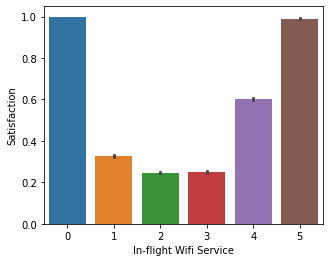

In [153]:
bar(df, 'In-flight Wifi Service')

- Rating 0 and 5 are strongly satisfied 
* Rating 4 are in medium
* 1-3 are mostly not satisfied

In [154]:
"""
0 & 5 : 0
4     : 1 
5     : 2
"""

final_df['Wifi'] = [0 if i == 0 or i == 5 else 1 if i <= 3 else 2 for i in df['In-flight Wifi Service']]

In [155]:
final_df['Wifi'].unique()

array([1, 2, 0], dtype=int64)

## In-flight Entertainment

In [160]:
df['In-flight Entertainment'].unique()

array([5, 3, 4, 2, 1, 0], dtype=int64)

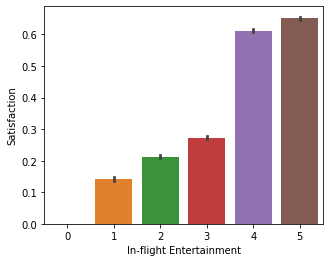

In [161]:
bar(df, 'In-flight Entertainment')

- Here 0-3 are less satisfied but 4 and 5 are good satsified
- Divide the data into two category from 0-3 and 4&5 

In [163]:
final_df['Entertainment'] = [0 if i <= 3 else 1 for i in df['In-flight Entertainment']]
final_df['Entertainment'].unique()

array([1, 0], dtype=int64)

## Baggage Handling

In [164]:
df['Baggage Handling'].unique()

array([5, 3, 4, 1, 2], dtype=int64)

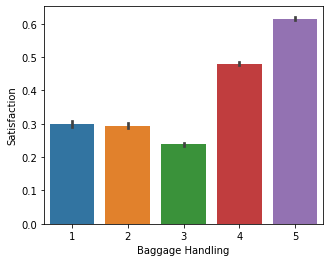

In [165]:
bar(df, 'Baggage Handling')

- Here it is found the three category
- 1-3 are similar kind of graph
- 4 and 5 differrent

In [167]:
final_df['Baggage_Handling'] = [0 if i <= 3 else 1 if i == 4 else 2 for i in df['Baggage Handling']]
final_df['Baggage_Handling'].unique()

array([2, 0, 1], dtype=int64)

### Now finally appending satisfaction columns to final dataframe

In [168]:
final_df['Satisfaction'] = df['Satisfaction']

In [169]:
final_df.head()

,Age_Grp,Returning,Class,Flight_Distance,Flight_Delay,Arrival_Delay,Ease,Check-in Service,Online_Boarding,Gate_Location,On-board_Service,Seat_Comfort,Leg_Room_Service,Cleanliness,Food_and_Drink,In-flight_Service,Wifi,Entertainment,Baggage_Handling,Satisfaction
0,2,0,0,0,1,1,1,1,2,1,0,1,0,3,2,2,1,1,2,0
1,1,1,0,0,1,1,1,1,0,1,1,1,1,3,1,2,1,1,2,1
2,2,1,0,0,0,0,0,1,0,1,0,1,0,3,2,0,2,0,0,1
3,2,1,0,1,0,0,1,1,1,1,1,1,1,2,1,2,1,1,2,1
4,2,1,0,1,0,1,1,1,0,1,0,1,1,3,1,0,1,0,0,1


In [170]:
final_df.shape

(129880, 20)

<AxesSubplot:>

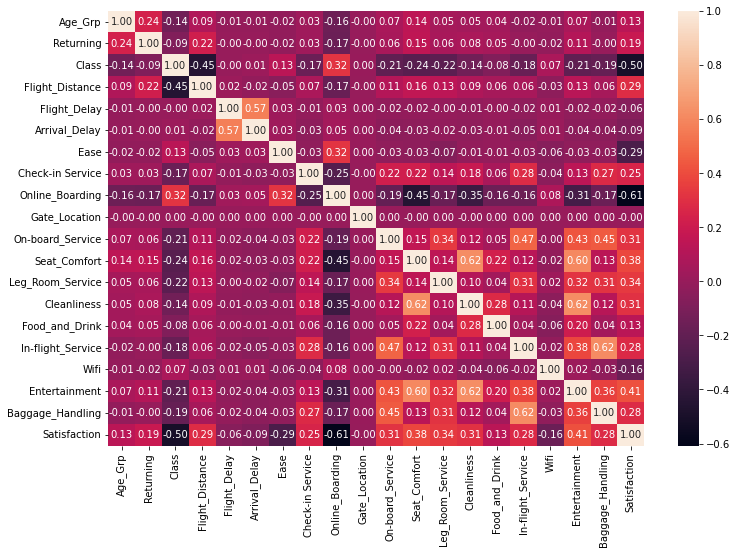

In [173]:
plt.figure(figsize=(12, 8))
sns.heatmap(final_df.corr(), annot = True, fmt='1.2f')

# Model training

In [174]:
X = final_df.iloc[:, :-1]
y = final_df.iloc[:, -1]

In [177]:
X.head()

,Age_Grp,Returning,Class,Flight_Distance,Flight_Delay,Arrival_Delay,Ease,Check-in Service,Online_Boarding,Gate_Location,On-board_Service,Seat_Comfort,Leg_Room_Service,Cleanliness,Food_and_Drink,In-flight_Service,Wifi,Entertainment,Baggage_Handling
0,2,0,0,0,1,1,1,1,2,1,0,1,0,3,2,2,1,1,2
1,1,1,0,0,1,1,1,1,0,1,1,1,1,3,1,2,1,1,2
2,2,1,0,0,0,0,0,1,0,1,0,1,0,3,2,0,2,0,0
3,2,1,0,1,0,0,1,1,1,1,1,1,1,2,1,2,1,1,2
4,2,1,0,1,0,1,1,1,0,1,0,1,1,3,1,0,1,0,0


In [178]:
from sklearn.model_selection import train_test_split

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [196]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [200]:
# Getting the parameter list
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [201]:
params = [{'n_estimators':[50, 70, 80, 90, 100, 120, 130, 200]}, {'max_depth': [5, 8, 10, 13, 15, 20, 30, 40, 50]}]

In [204]:
model = GridSearchCV(RandomForestClassifier(), param_grid=params, verbose=2)

In [205]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 17 candidates, totalling 85 fits
[CV] END ....................................n_estimators=50; total time=  14.9s
[CV] END ....................................n_estimators=50; total time=  18.4s
[CV] END ....................................n_estimators=50; total time= 1.0min
[CV] END ....................................n_estimators=50; total time=  59.1s
[CV] END ....................................n_estimators=50; total time=  51.9s
[CV] END ....................................n_estimators=70; total time= 1.4min
[CV] END ....................................n_estimators=70; total time=  47.9s
[CV] END ....................................n_estimators=70; total time=  23.0s
[CV] END ....................................n_estimators=70; total time=  18.2s
[CV] END ....................................n_estimators=70; total time=  21.6s
[CV] END ....................................n_estimators=80; total time=  34.3s
[CV] END ....................................n_e

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid=[{'n_estimators': [50, 70, 80, 90, 100, 120, 130, 200]},
                         {'max_depth': [5, 8, 10, 13, 15, 20, 30, 40, 50]}],
             verbose=2)

In [211]:
model.best_params_

{'max_depth': 15}

In [206]:
accuracy_score(y_train, model.predict(X_train))

0.9623938580667869

In [207]:
accuracy_score(y_test, model.predict(X_test))

0.941895082640386

In [212]:
confusion_matrix(y_test, model.predict(X_test))

array([[21200,   910],
       [ 1354, 15500]], dtype=int64)

In [222]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     22110
           1       0.94      0.92      0.93     16854

    accuracy                           0.94     38964
   macro avg       0.94      0.94      0.94     38964
weighted avg       0.94      0.94      0.94     38964

